In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


In [ ]:
file_path = '/content/LBMA-SILVER.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')


In [ ]:
df = df.sort_index()

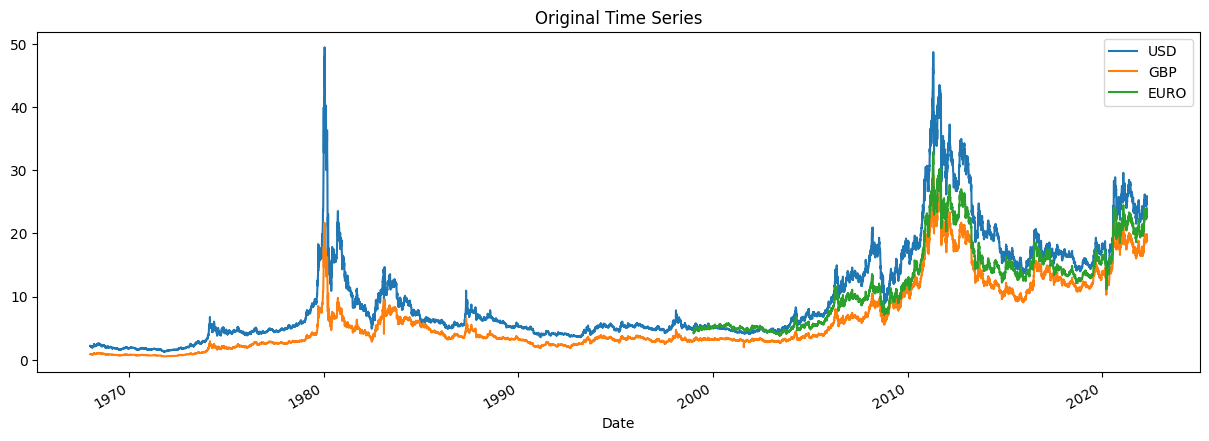

In [ ]:
df.plot(title='Original Time Series', figsize=(15,5))
plt.show()


<ipython-input-7-9e932d62eadb>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


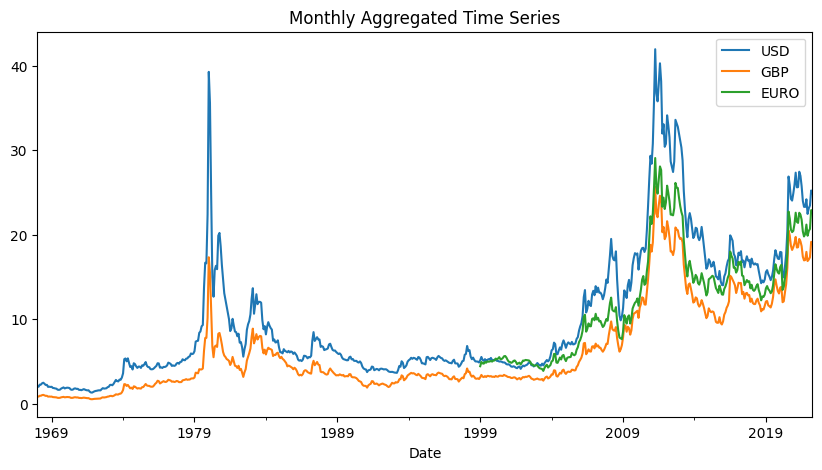

In [ ]:
df_monthly = df.resample('M').mean()
df_monthly.plot(title='Monthly Aggregated Time Series', figsize=(10,5))
plt.show()

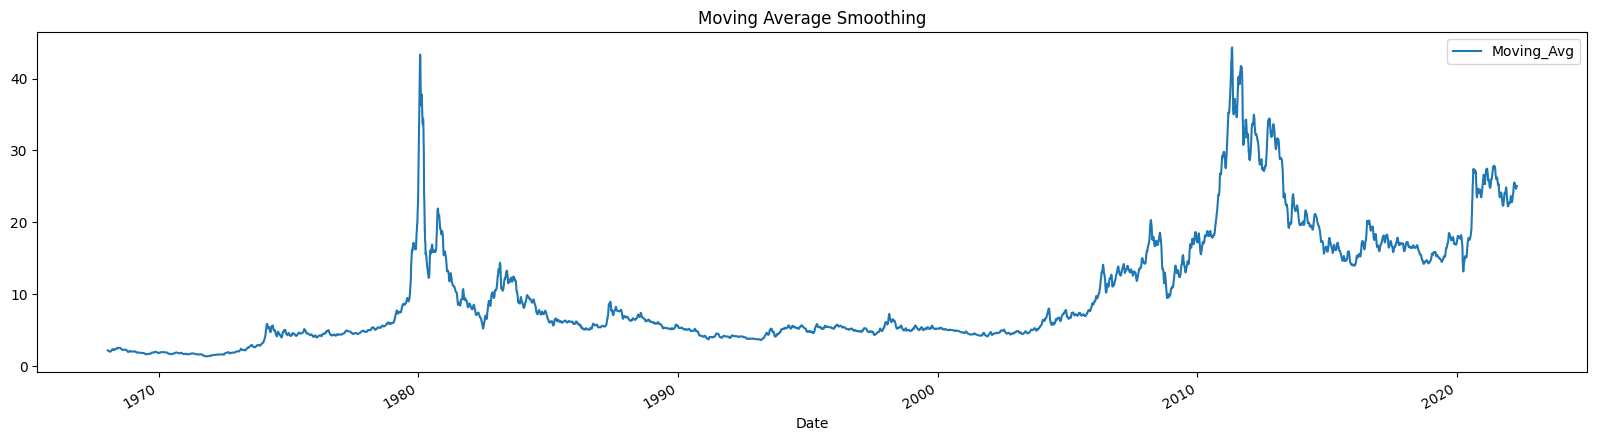

In [ ]:
window_size = 10
df['Moving_Avg'] = df.iloc[:, 0].rolling(window=window_size).mean()
df[['Moving_Avg']].plot(title='Moving Average Smoothing', figsize=(20,5))
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


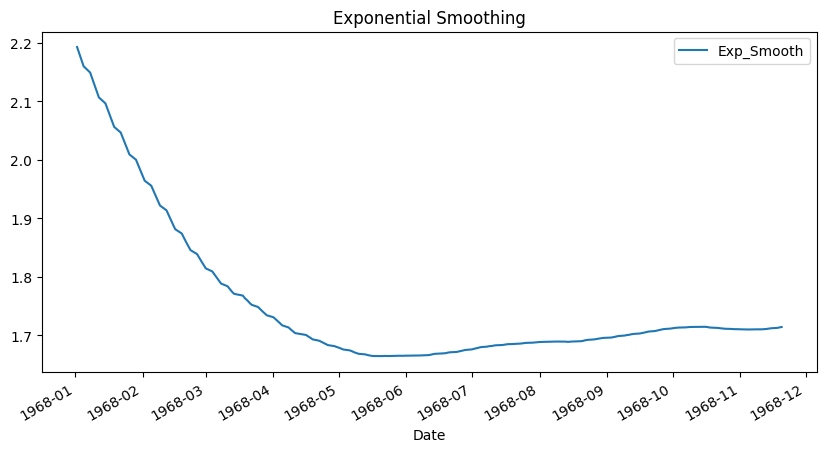

In [ ]:
es_model = ExponentialSmoothing(df.iloc[:, 0], trend='add', seasonal=None, damped_trend=True)
es_fit = es_model.fit()
df['Exp_Smooth'] = es_fit.fittedvalues
df[['Exp_Smooth']].plot(title='Exponential Smoothing', figsize=(10,5))
plt.show()

In [ ]:
print(df.head())


              USD      GBP  EURO  Moving_Avg  Exp_Smooth
Date                                                    
1968-01-02  2.173  0.90417   NaN         NaN    2.192968
1968-01-03  2.225  0.92500   NaN         NaN    2.181748
1968-01-04  2.171  0.90208   NaN         NaN    2.170956
1968-01-05  2.157  0.89583   NaN         NaN    2.160058
1968-01-08  2.163  0.89792   NaN         NaN    2.149253
